# MOVIE RECOMMENDER SYSTEM

#### Step 1: Define Research Goal
To develop a content-based recommender system which recommends top 5 movies similar to a given movie.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Data Collection
The dataset has been taken from Kaggle.
Link: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv

In [4]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

#### Step 3: Exploratory Data Analysis
1. Exploring the dataset(statistical measures, data types, shape, etc.)
2. Exploring and visulaizing Numerical features
3. Exploring and visulaizing Categorical features

In [5]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies.shape

(4803, 20)

In [8]:
credits.shape

(4803, 4)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [11]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Merging the two datasets on 'title'

In [12]:
df = movies.merge(credits, on='title')

In [13]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
df.shape

(4809, 23)

In [15]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object

In [16]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [17]:
for features in df.columns:
    print(df[features].value_counts())

0           1039
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
650            1
5600000        1
22500000       1
2159280        1
22700000       1
Name: budget, Length: 436, dtype: int64
[{"id": 18, "name": "Drama"}]                                                                                                                                    372
[{"id": 35, "name": "Comedy"}]                                                                                                                                   282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                  164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                 144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                      

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [19]:
# Displaying the statistical measures of the numerical features of the dataset
df.describe(include=np.number)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


###### Correlation Matrix

<AxesSubplot:>

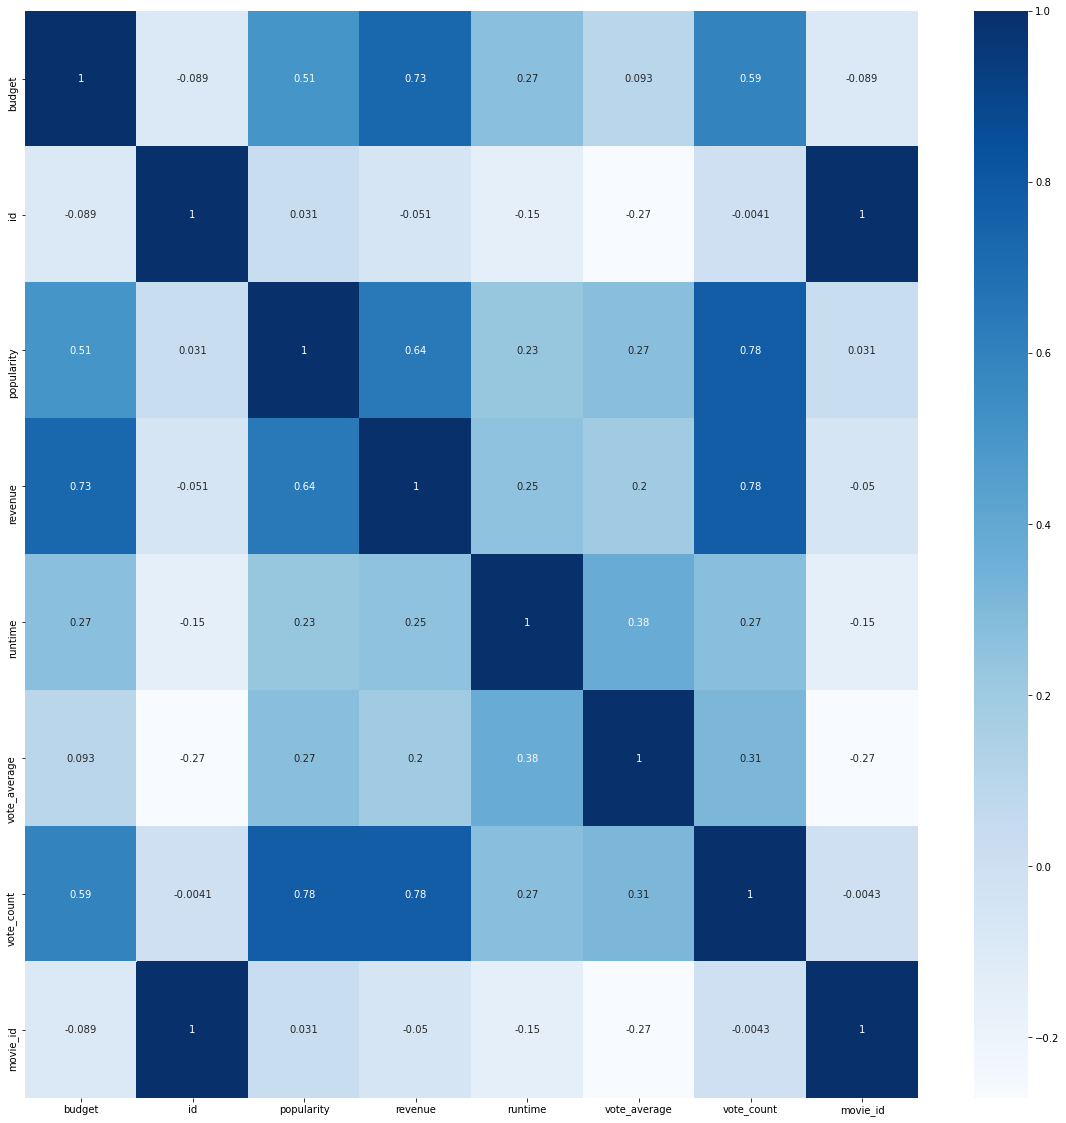

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

Inference: Id and movie_id are highly correlated (as they denote the same information), so one of them has to be dropped

In [21]:
# Displaying the statistical measures of the categorical features of the dataset
df.describe(include='O')

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,4809,1713,4809,4809,4809,4806,4809,4809,4808,4809,4809,3965,4809,4809,4809
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800,4761,4776
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.missionimpossible.com/,[],en,Out of the Blue,Ordinary people find extraordinary courage in ...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Batman,[],[]
freq,372,4,412,4510,4,2,352,2979,10,3175,4801,3,4,43,28


###### Checking for NaN values

In [22]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

<AxesSubplot:>

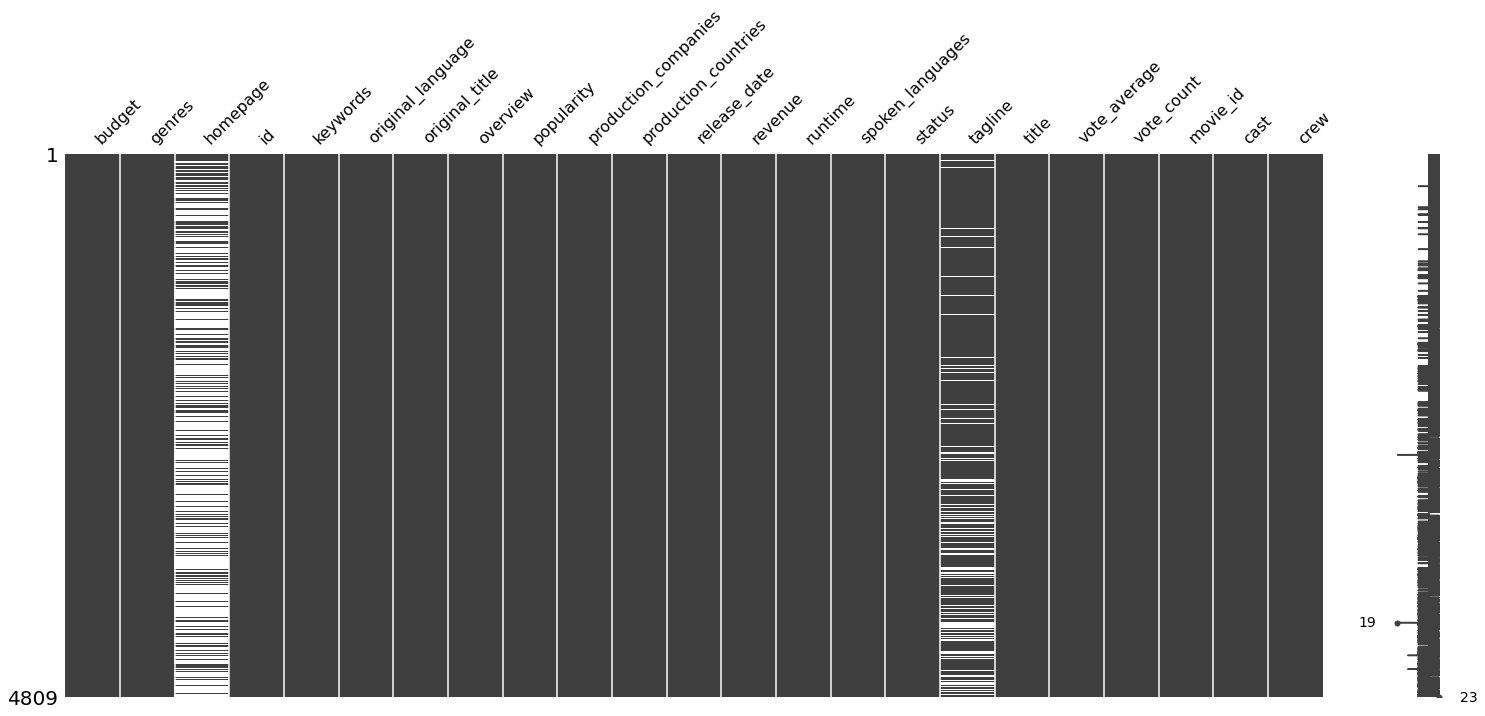

In [23]:
# Visualize missing values as a matrix
import missingno as msno
msno.matrix(df)

Inference: There are NaN values in the 'homepage' and 'tagline' features which needs to be handled

###### DataFrame with numerical features for EDA

In [24]:
df_num = df.select_dtypes(include=np.number)

In [25]:
df_num.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,19995
1,300000000,285,139.082615,961000000,169.0,6.9,4500,285
2,245000000,206647,107.376788,880674609,148.0,6.3,4466,206647
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106,49026
4,260000000,49529,43.926995,284139100,132.0,6.1,2124,49529


###### Visualization of the numerical features of the dataset using Distribution Plots

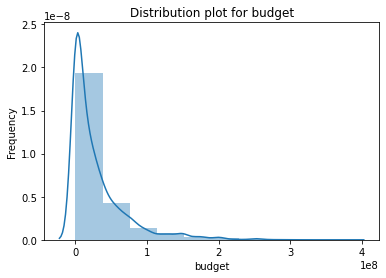

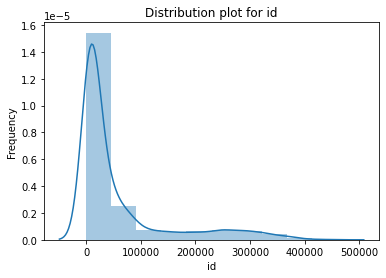

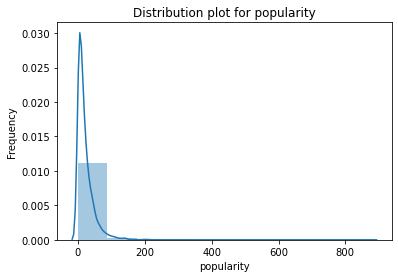

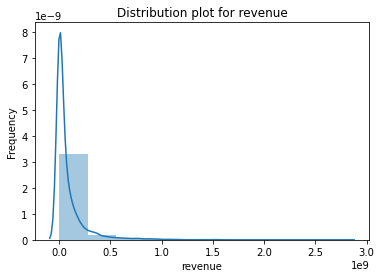

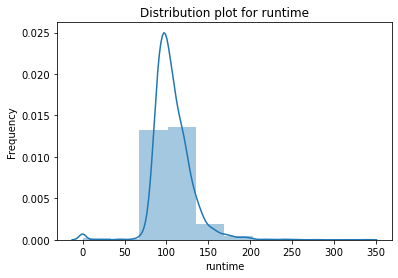

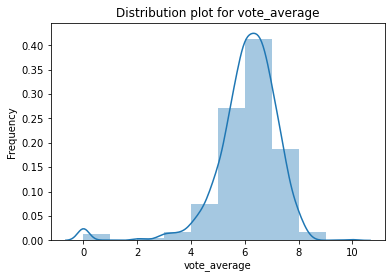

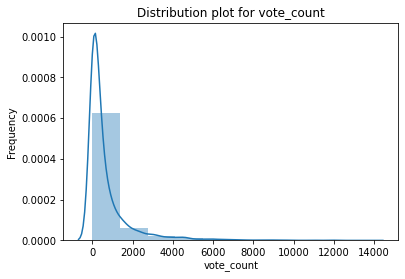

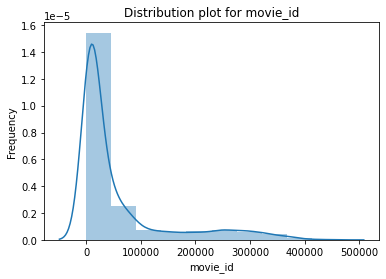

In [26]:
for cols in df_num.columns:
    distributionplot = sns.distplot(a=df_num[cols], bins=10, hist=True, kde=True)
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.title('Distribution plot for ' + cols)
    plt.show()

Inference: The data is highly skewed for some features

In [27]:
df_num[["year", "month", "day"]] = df["release_date"].str.split("-", expand = True)

In [28]:
df_num.head(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,year,month,day
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,19995,2009,12,10
1,300000000,285,139.082615,961000000,169.0,6.9,4500,285,2007,05,19


In [29]:
df_num.drop(['month','day'],axis=1).head(2)

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,year
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,19995,2009
1,300000000,285,139.082615,961000000,169.0,6.9,4500,285,2007


In [30]:
df_num['year']=df_num['year'].dropna().astype(int)

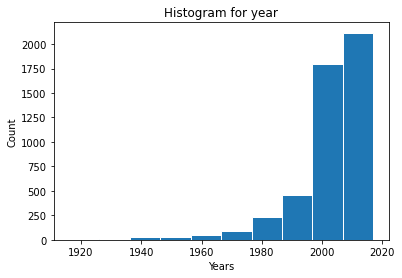

In [31]:
histplots = plt.hist(x=df_num['year'],edgecolor='w',bins=10)
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Histogram for year')
plt.show()

In [32]:
df['year']=df_num['year']

###### DataFrame with categorical features for EDA

In [33]:
df_cat = df.select_dtypes(include= 'O')

In [34]:
df_cat.head()

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


###### Visualization of the categorical features of the dataset using Count Plots

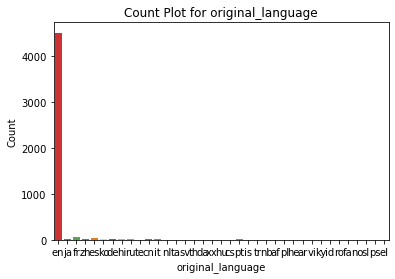

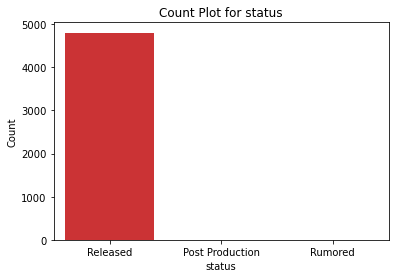

In [35]:
for cols in ['original_language','status']:
    countplots = sns.countplot(x=df_cat[cols], data=df_cat, palette='Set1')
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.title('Count Plot for ' + cols)
    plt.show()

###### Displaying the cardinality and unique categories of each categroical feature

In [36]:
for cols in df_cat.columns:
    print("Number of unique categories in df[{}] are {}".format(cols,  df[cols].nunique()))
#     print("Unique categories in df[{}] are {}".format(cols, df[cols].unique()))
    print("\n")

Number of unique categories in df[genres] are 1175


Number of unique categories in df[homepage] are 1691


Number of unique categories in df[keywords] are 4222


Number of unique categories in df[original_language] are 37


Number of unique categories in df[original_title] are 4801


Number of unique categories in df[overview] are 4800


Number of unique categories in df[production_companies] are 3697


Number of unique categories in df[production_countries] are 469


Number of unique categories in df[release_date] are 3280


Number of unique categories in df[spoken_languages] are 544


Number of unique categories in df[status] are 3


Number of unique categories in df[tagline] are 3944


Number of unique categories in df[title] are 4800


Number of unique categories in df[cast] are 4761


Number of unique categories in df[crew] are 4776




#### Step 4: Feature Selection
This step involves the selection of critical features while dropping the unnecessary features.

<AxesSubplot:>

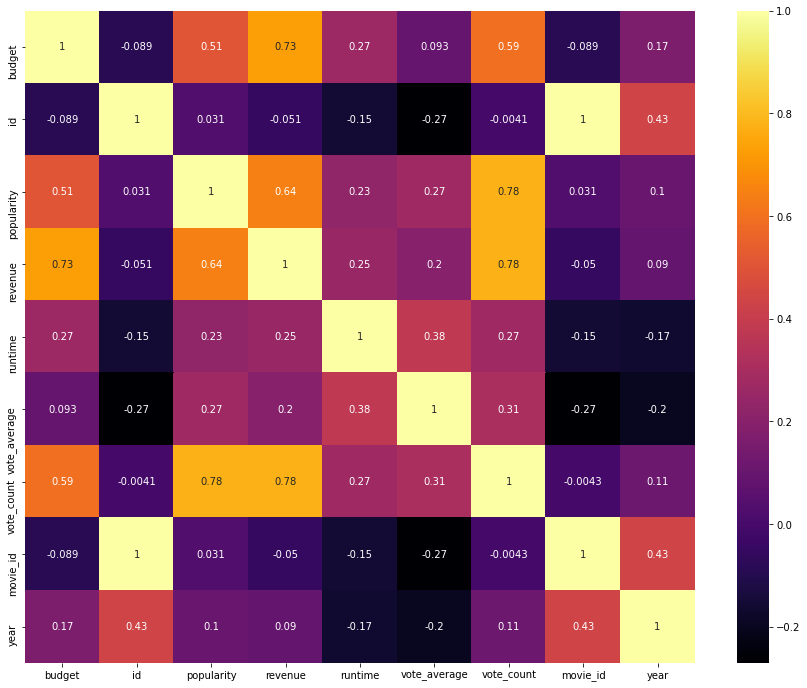

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, cmap="inferno")

In [38]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

In [39]:
corr_features = correlation(df, 0.85)

In [40]:
corr_features

{'movie_id'}

In [41]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew', 'year'],
      dtype='object')

Inference: movie_id should be dropped

###### As per the problem statement and domain knowledge, the following features should be dropped

-> budget

-> homepage

-> keywords

-> original_title

-> overview

-> production_companies

-> production_countries

-> release_date 

-> spoken_languages

-> status

-> tagline

-> movie_id

In [42]:
df = df.drop(['movie_id', 'homepage', 'original_title', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'movie_id'], axis=1).head(2)

In [43]:
df.head(2)

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0


In [44]:
df.dtypes

budget                 int64
genres                object
id                     int64
keywords              object
original_language     object
overview              object
popularity           float64
revenue                int64
runtime              float64
title                 object
vote_average         float64
vote_count             int64
cast                  object
crew                  object
year                 float64
dtype: object

#### Step 5: Feature Engineering


In [45]:
df.isnull().sum()

budget               0
genres               0
id                   0
keywords             0
original_language    0
overview             0
popularity           0
revenue              0
runtime              0
title                0
vote_average         0
vote_count           0
cast                 0
crew                 0
year                 0
dtype: int64

In [46]:
cols = df.select_dtypes(include=np.number)
cols

,budget,id,popularity,revenue,runtime,vote_average,vote_count,year
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800,2009.0
1,300000000,285,139.082615,961000000,169.0,6.9,4500,2007.0


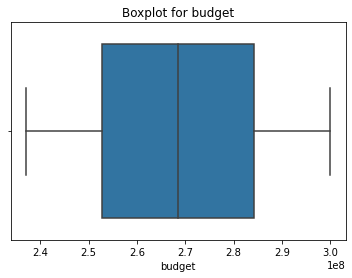

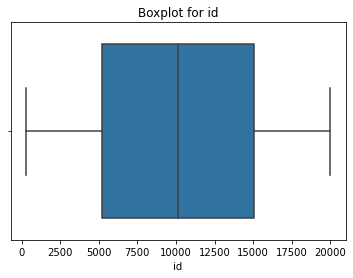

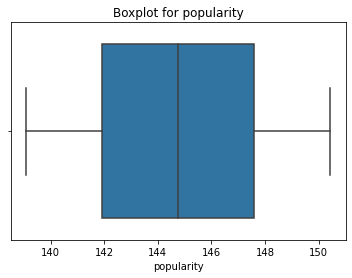

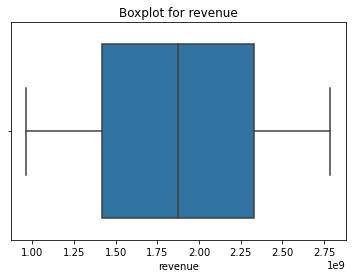

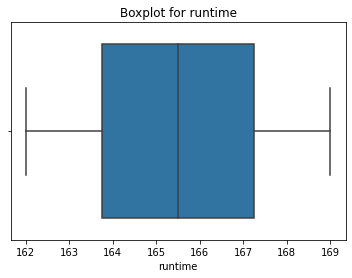

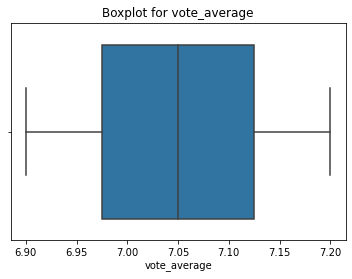

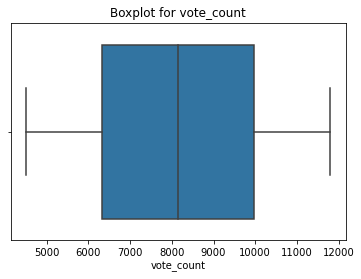

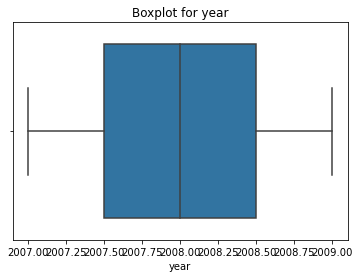

In [47]:
for col in cols:
    bp = sns.boxplot(df[col])
    plt.xlabel(col)
    plt.title('Boxplot for ' + col)
    plt.show()

Inference: There are no NaN values and outliers in the dataset

In [48]:
import ast

In [49]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [50]:
df['genres'] = df['genres'].apply(convert)
df['keywords'] = df['keywords'].apply(convert)
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0


In [51]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [52]:
df['cast'] = df['cast'].apply(convert3)

In [53]:
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0


In [54]:
df['cast'] = df['cast'].apply(lambda x:x[0:3])

In [55]:
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0


In [56]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [57]:
df['crew'] = df['crew'].apply(fetch_director)

In [58]:
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],2007.0


In [59]:
def removespaces(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [60]:
df['cast'] = df['cast'].apply(removespaces)
df['crew'] = df['crew'].apply(removespaces)
df['genres'] = df['genres'].apply(removespaces)
df['keywords'] = df['keywords'].apply(removespaces)

In [61]:
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007.0


In [62]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [63]:
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009.0
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007.0


In [64]:
df['tags'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

In [65]:
df['tags'] = df['tags'].apply(lambda x: " ".join(x))
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year,tags
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009.0,"In the 22nd century, a paraplegic Marine is di..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007.0,"Captain Barbossa, long believed to be dead, ha..."


In [66]:
df.drop

<bound method DataFrame.drop of       budget                                        genres     id  \
0  237000000  [Action, Adventure, Fantasy, ScienceFiction]  19995   
1  300000000                  [Adventure, Fantasy, Action]    285   

                                            keywords original_language  \
0  [cultureclash, future, spacewar, spacecolony, ...                en   
1  [ocean, drugabuse, exoticisland, eastindiatrad...                en   

                                            overview  popularity     revenue  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...  150.437577  2787965087   
1  [Captain, Barbossa,, long, believed, to, be, d...  139.082615   961000000   

   runtime                                     title  vote_average  \
0    162.0                                    Avatar           7.2   
1    169.0  Pirates of the Caribbean: At World's End           6.9   

   vote_count                                           cast             crew  \
0   

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [68]:
vector = cv.fit_transform(df['tags']).toarray()

In [69]:
vector.shape

(2, 77)

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.07024394],
       [0.07024394, 1.        ]])

In [72]:
df.head()

,budget,genres,id,keywords,original_language,overview,popularity,revenue,runtime,title,vote_average,vote_count,cast,crew,year,tags
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2787965087,162.0,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009.0,"In the 22nd century, a paraplegic Marine is di..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",en,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007.0,"Captain Barbossa, long believed to be dead, ha..."


In [73]:
df[df['title'] == 'Avatar'].index[0]

0

In [74]:
def recommend(movie):
    index = df[df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(df.iloc[i[0]].title)

In [75]:
recommend('Avatar')

Pirates of the Caribbean: At World's End
